# KNN (분류,예측 모델)

근접한 학습 데이터로 분류를 하는 것이 KNN 모델이며 분포가 편향되어 있을 경우 예측 데이터들의 관측치들이 빈도 높은 범주로 강하게 쏠리는 단점이 있다. -> K를 잘 설정해줘야 하는데, 동률의 범주가 생겨 분류를 할 수 없는 생황을 방지하기 위해 홀수로 K를 지정한다. k가 크면 전체 범주의 분포의 영향을 많이 받고, k가 너무 작으면 이상치의 영향을 많이 받고 패터니 직관적이지 못하다. 

In [17]:
# 필요한 패키지 설치
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

# 에러 안보이게할래
import warnings
warnings.filterwarnings('ignore')

In [18]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
df = pd.read_excel("datasets/Raisin_Dataset.xlsx")

# 데이터 샘플 확인
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [19]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


In [20]:
# 기본 K-nn 모델 생성 및 적용
classifier = KNeighborsClassifier(n_neighbors = 3, 
                                  weights='uniform', 
                                  metric="minkowski")
# uniform은 이웃한 관측치와의 거리에 가중치를 주지 않는 옵션
# metric은 거리측정 방식 옵션으로 기본값은 민코프스키 그외 유클리드, 마할라노비스 등 
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.9111111111111111
0.8388888888888889


# 최적의 k구하기

교차검증을 하여 오분류율이 가장 낮아지는 k수를 탐색한다. 

### 1. 거리 가중치 미적용

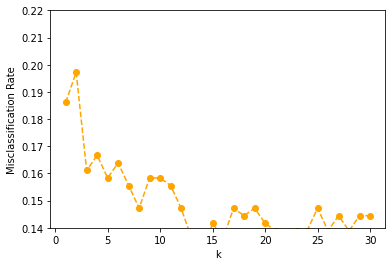

In [21]:
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')

    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

KNN 모델의 오분류율 시각화 - 6개로 설정

### 2. 거리 가중치 적용 (1~30)

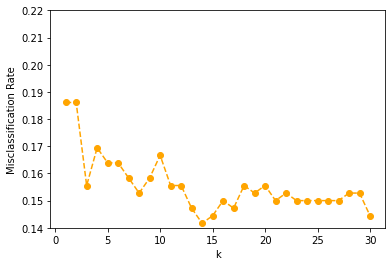

In [22]:
k_num = range(1,31)
accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

KNN 모델의 오분류율 시각화 -> 가중치를 적용한 것이 오분류율 감소. 변동성도 약해짐. 

### 3. 거리 가중치 적용 (1~200)

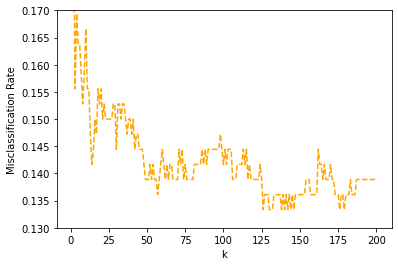

In [23]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

50과 125기점으로 줄었다가 다시 늘어남

### 1. 결정경계선 시각화를 위한 차원축소

In [26]:
# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,-0.035160,0.002868
1,-0.269323,-0.268726
2,-0.164437,0.031820
3,0.029113,-0.251697
4,-0.173345,-0.153835


### 2. 결정 경계선(decision boundary) 시각화 확인

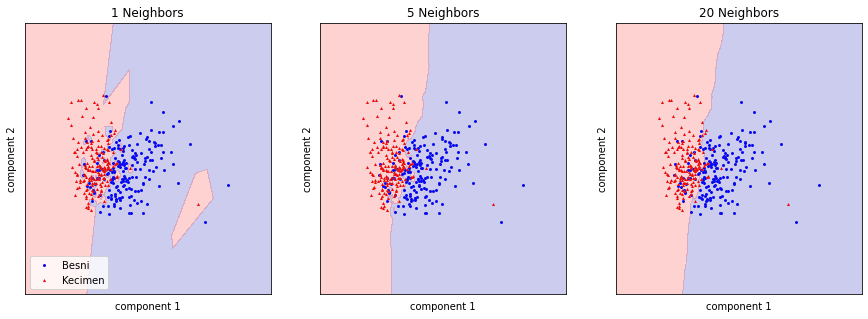

In [27]:
# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 이웃 수 1, 5, 20에 따른 결정곙계 시각화
for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x, 
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1], 
                             df_vsl_y, markeredgewidth=0.1, 
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)

이웃수가 적정하게 늘어나면 학습셋의 디테일한 분류는 힘들어지지만 범용적인 모델이 되어 테스트셋의 정확도를 높여준다.